# Day 19 Pre-class Assignment: ZOMBIES!!

### <p style="text-align: right;"> &#9989; Put your name here</p>

____
<img src="https://s-media-cache-ak0.pinimg.com/736x/68/d3/bc/68d3bccc93b1c64bd46c80e95bd400ee.jpg" width=300px>

### Goals for today's pre-class assignment:
* Continue to explore compartmental models using `solve_ivp`
* Understand the dynamics of a disease outbreak models and the parameters that determine their behavior.

### Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into appropriate "Pre-class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---
In this notebook, we model a zombie invasion and use it to demonstrate how to use SciPy's `solve_ivp`. The model used here is described in the paper by Munz et al.:

[Munz, Hudea, Imad, Smith, "When zombies attack!: mathematical modelling of an outbreak of zombie infection." In J.M. Tchuenche and C. Chiyaka, editors, Infectious Disease Modelling Research Progress, 133-150, 2009.](http://loe.org/images/content/091023/Zombie%20Publication.pdf)

<br>

For those interested, the original [code from the paper is here](https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html), which has been modified below to improve readability. In this assignment you will be starting with basic, working code and modifying it to model more interesting scenarios. First, read through the following description of the problem and model.

The zombie model is a [**compartmental model**](https://en.wikipedia.org/wiki/Multi-compartment_model) that uses three compartments **S**, **Z**, and **R**.  This is discussed on the chalk board here and in more detail with slightly different, clearer, variables below.  

<img src="https://i.imgur.com/9HTp47I.png" width=800>

As discussed in the Munz et al paper, the compartments represent three groups:
- Susceptible (S)
- Zombie (Z)
- Removed (R)

In short, the _Susceptibles_ are healthy humans that can increase in number with more births and decrease through natural deaths.  Furthermore, _Susceptibles_ can become _Zombies_ via a failed encounter to defend oneself from a zombie.   The _Zombies_ can come from two sources: the resurrected from the deceased (_Removed_ group) and from _Susceptibles_ who have ‘lost’ an encounter with a zombie.  _Zombies_ reduce upon being defeated.  The _Removed_ group represent dead humans and zombies.  This post-apocalyptic world can be represented graphically as a compartmental model:  

### SZR MODEL
<img src="https://i.ibb.co/QDNpn1v/zombie-model.png" alt="zombie-model">

The ODE version of this, using the notation in the immediate model above and in the code below, is:

$\frac{dS}{dt} = b - aSZ - dS,$

$\frac{dZ}{dt} = aSZ + gR - kSZ,$

$\frac{dR}{dt} = dS + kSZ - gR.$

**Note**: The code below doesn't use the same parameter names that are stated in the paper and so you shouldn't be trying to compare the plots in the paper to the ones that you get. In fact, it turns out that the author of the paper was a bit sloppy with their code and wasn't consistent with the parameters used in their model. Additionally, they didn't use an accurate solver like `solve_ivp` to evolve their system! If you take a look at their code at the end of the paper, you can even see that they made a simplifying assumption in their model that isn't well explained in the paper. This is a good example of how **_not_** to write a high-quality paper. Of course, exploring this model is still valuable and we'll make sure we do it correctly!

**Run the code below to make sure it works and produces three plots. Review the code and make sure you understand how it works.**

In [6]:
# Basic Zombie Model
#
# This code runs the basic zombie model for three different initial
# conditions for the same model. You will do something very similar, but 
# run the same initial conditions for four different models.

# Import the usual libraries; most important are the visualization
# and SciPy's solve_ivp.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp
from IPython.display import display, clear_output, set_matplotlib_formats

# The model is expressed in terms of ODEs and this is where
# they are defined in a manner consistent with what solve_ivp wants to see.
# solve the system dy/dt = f(y, t)
# Define a function of the derivatives of this system

def derivatives_szr(t, y, b, d, a, g, k):
    '''NOTE: b, d, a, g, and k are constants that we can change 
    based on what we are exploring with the model. These are positional arguments
    that we will pass to solve_ivp using the "args" argument in the solve_ivp function call!
    b = birth rate
    d = natural death percent per day
    a = transmission percent per day
    g = resurrected percent per day
    k = kill/destroy percent per day
    '''
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # the model equations (see Munz et al. 2009)
    dSdt = b - a*Si*Zi - d*Si
    dZdt = a*Si*Zi + g*Ri - k*Si*Zi
    dRdt = d*Si + k*Si*Zi - g*Ri
    return [dSdt, dZdt, dRdt]

## Running the SZR Model Code
Now that we have our Derivatives function set up, we are going to define some values for our rates (b, d, a, g, and k) amd run our model **three times with three different initial conditions**. This means we want to see how the populations in each compartment change given a starting point (for the first experiment, we'll say that we start with 500 susceptible humans (S_initial = 500), no Zombies (Z_initial = 0), and no removed people/zombies (R_initial = 0).

**NOTE:** When we start using and re-using code and running models more than once, it is **critical** to use **unique variable names** when you have changed things to keeptrack of your variables. The code below provides you with an example by labeling our "experiment" variables as `variable_name_exp1`, etc. so we know which initial conditions correspond to which outputs!

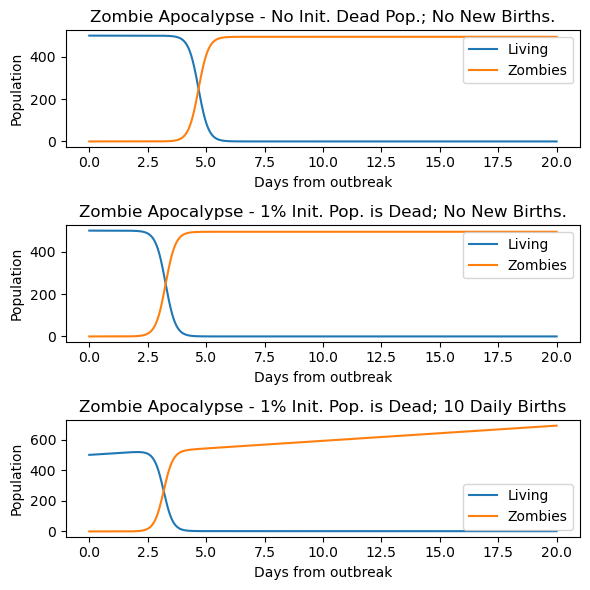

In [23]:
# Run model for three different sets of conditions


# The constant parameters of the model are collected and defined here.
# We will keep these values constant for (almost) all three "experiments" 
# (i.e. the only thing changing for each experiment is S, Z, and/or R)

b_experimental = 0       # birth rate
d_experimental = 0.0001  # natural death percent (per day)
a_experimental = 0.0095  # transmission/attacked percent  (per day)
g_experimental = 0.0001  # resurrect percent (per day)
k_experimental = 0.0001   # kill/destroy percent  (per day)

# Throughout this notebook, we want to keep our time array the same, 
# so we'll define it once here and keep using it!
t  = np.linspace(0, 20., 1000)   # time array


# 1. Experiment #1: No initial dead population, no new births
#
# initial conditions for Experiment 1 (_exp1)
S0_exp1 = 500.               # initial population
Z0_exp1 = 0                  # initial zombie population
R0_exp1 = 0                  # initial death population
y0_exp1 = [S0_exp1, Z0_exp1, R0_exp1]       # initial condition list


# solve the ODEs
soln_exp1 = solve_ivp(derivatives_szr, (0,20),y0_exp1, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp1 = soln_exp1.y[0, :]
Z_exp1 = soln_exp1.y[1, :]
R_exp1 = soln_exp1.y[2, :]

plt.figure(figsize=(6,6))
# plot results
plt.subplot(311)
plt.plot(t, S_exp1, label='Living')
plt.plot(t, Z_exp1, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

#
# 2. Experiment #2: The Removed population is 1% initial susceptible population, no new births
#
#
# set the new initial conditions
S0_exp2 = 500
Z0_exp2 = 0
R0_exp2 = 0.01*S0_exp2   # 1% of initial pop is dead
y0_exp2 = [S0_exp2, Z0_exp2, R0_exp2]

# solve the ODEs
soln_exp2 = solve_ivp(derivatives_szr, (0,20),y0_exp2, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp2 = soln_exp2.y[0, :]
Z_exp2 = soln_exp2.y[1, :]
R_exp2 = soln_exp2.y[2, :]

plt.subplot(312)
plt.plot(t, S_exp2, label='Living')
plt.plot(t, Z_exp2, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

#
# 3. Experiment #3: The Removed population is 1% initial susceptible population, no new births, 10 new births daily
#
# 
S0_exp3 = 500
Z0_exp3 = 0
R0_exp3 = 0.01*S0_exp2   # 1% of initial pop is dead
y0_exp3 = [S0_exp3, Z0_exp3, R0_exp3]

# NOTE: Here we are changing the value of b (birth rate) that we give to solve_ivp
# Locate it in the args argument in the solve_ivp call below!!
b_exp3  = 10        # 10 new births daily

# solve the DEs
soln_exp3 = solve_ivp(derivatives_szr, (0,20),y0_exp3, t_eval = t, args=(b_exp3, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp3 = soln_exp3.y[0, :]
Z_exp3 = soln_exp3.y[1, :]
R_exp3 = soln_exp3.y[2, :]


plt.subplot(313)
plt.plot(t, S_exp3, label='Living')
plt.plot(t, Z_exp3, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)

plt.tight_layout()

___
### SIZR Model

To make this more realistic, we need to modify the code above to have a "latent/infected" class, which we will call **I**, and call this the SIZR model. Changes to the basic model include:
- Susceptibles first move to an infected class once infected and remain there for some period of time.
- Infected individuals can still die a ‘natural’ death before becoming zombies; otherwise, they become zombies at a certain rate. __Note:__ In many disease models, this might be called **L** for latent so that **I** can be used to refer to those that are infectious (i.e. can spread the disease). In our zombie model, the fully infected group is represented by Z.  (Zombie invasions are not your standard infectious disease!)


When we model infectious diseases, you will see more of this notation.  The model can now be presented graphically as:

<img src="https://i.ibb.co/YtRmd9h/zombie-model-SIZR.png" alt="zombie-model-SIZR" border="0" width=860>

Next, **copy the code above and modify it to include the latent class**. Put the new version of the code here, using a different name for the function so that you can still use the original as a baseline case for comparison. 

For this model, **you need to implement a new parameter, $r$**. However, don't use the value that they mention in the paper. Instead, use $r = 0.5$. For this section **run the model for 20 days** since the latent phase will stall the zombie take-over!

Our Ordinary Differential Equations for this new model will look like this:

$\frac{dS}{dt} = b - aSZ - dS,$

$\frac{dI}{dt} = aSZ - rI - dI,$

$\frac{dZ}{dt} = rI + gR - kSZ,$

$\frac{dR}{dt} = dS + dI + kSZ - gR.$

You should get something that looks like this:

<img src="https://i.imgur.com/i3FuLFC.png" width=500px>

**Let's start with your new derivatives equation**

Below is the code from the SZR model. Modify it so that it now has the appropriate derivative equations for the SIZR model!

In [28]:
# MODIFY THIS DERIVATIVES EQUATION FOR SIZR


def SIZR(t, y, b, d, a, g, k ): # Modify this to add the constant "r"!
    '''NOTE: b, d, a, g, and k are constants that we can change 
    based on what we are exploring with the model. These are positional arguments
    that we will pass to solve_ivp using the "args" argument in the solve_ivp function call!
    b = birth rate
    d = natural death percent per day
    a = transmission percent per day
    g = resurrected percent per day
    k = kill/destroy percent per day
    r = conversion from infected to Zombies per day
    '''
    Si = y[0]
    Ii = # Modify me!
    Zi = y[2]
    Ri = y[3]
    # the model equations (see Munz et al. 2009)
    dSdt = b - a*Si*Zi - d*Si
    dIdt = # Modify me!
    dZdt = r*Ii + g*Ri - k*Si*Zi
    dRdt = d*Si + d*Ii + k*Si*Zi - g*Ri
    return [dSdt, dIdt, dZdt, dRdt]

SyntaxError: invalid syntax (4004280118.py, line 16)

#### &#9989;&nbsp; Question
What modifications did you make to the equations? What modifications were already provided? 

**Put your answer here!**

---
**Now that you have a derivatives function, it's time to run some experiments!**

This is a great time to re-use some code, so in the cell below, we've copied the code from the three experiments for the SZR model. Your job is to **adapt that code for this new set of equations.** You can set I initial (I0) to 0 for all three experiments. You will need to add information about the I compartment everywhere you have S, Z, and R!

**Do your best to use new variable names**

In [40]:
# From above, we already have constants for b, d, a, g, and k that we will keep using
# So here, we are just going to defin our value for r (look back at the problem for the value!)

r_experimental = ??      # conversion from infected to zombies (per day)

# NOTE: We also are going to keep using our time array from before
# so no need to redefine it!

# 1. Experiment #1: No initial dead population, no new births

# initial conditions for Experiment 1 (_exp1)
S0_exp1 = 500.               # initial population
Z0_exp1 = 0                  # initial zombie population
R0_exp1 = 0                  # initial death population
y0_exp1 = [S0_exp1, Z0_exp1, R0_exp1]       # initial condition list


# solve the ODEs
soln_exp1 = solve_ivp(derivatives_szr, (0,10),y0_exp1, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp1 = soln_exp1.y[0, :]
Z_exp1 = soln_exp1.y[1, :]
R_exp1 = soln_exp1.y[2, :]

plt.figure(figsize=(6,6))
# plot results
plt.subplot(311)
plt.plot(t, S_exp1, label='Living')
plt.plot(t, Z_exp1, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

#
# 2. Experiment #2: The Removed population is 1% initial susceptible population, no new births
#
#
# set the new initial conditions
S0_exp2 = 500
Z0_exp2 = 0
R0_exp2 = 0.01*S0_exp2   # 1% of initial pop is dead
y0_exp2 = [S0_exp2, Z0_exp2, R0_exp2]

# solve the ODEs
soln_exp2 = solve_ivp(derivatives_szr, (0,10),y0_exp2, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp2 = soln_exp2.y[0, :]
Z_exp2 = soln_exp2.y[1, :]
R_exp2 = soln_exp2.y[2, :]

plt.subplot(312)
plt.plot(t, S_exp2, label='Living')
plt.plot(t, Z_exp2, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

#
# 3. Experiment #3: The Removed population is 1% initial susceptible population, no new births, 10 new births daily
#
# 
S0_exp3 = 500
Z0_exp3 = 0
R0_exp3 = 0.01*S0_exp2   # 1% of initial pop is dead
y0_exp3 = [S0_exp3, Z0_exp3, R0_exp3]

# NOTE: Here we are changing the value of b (birth rate) that we give to solve_ivp
# Locate it in the args argument in the solve_ivp call below!!
b_exp3  = 10        # 10 new births daily

# solve the ODEs
soln_exp3 = solve_ivp(derivatives_szr, (0,10),y0_exp3, t_eval = t, args=(b_exp3, d_experimental, a_experimental, g_experimental, k_experimental))
S_exp3 = soln_exp3.y[0, :]
Z_exp3 = soln_exp3.y[1, :]
R_exp3 = soln_exp3.y[2, :]


plt.subplot(313)
plt.plot(t, S_exp3, label='Living')
plt.plot(t, Z_exp3, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)

plt.tight_layout()


SyntaxError: invalid syntax (1640670010.py, line 4)

---
### SIZR model with a cure, SIZRC 

If/when there is a zombie invasion, the Centers for Disease Control and Prevention will be in charge of mitigating the impending disaster (we hope!). There are various tools in their toolbox for doing this, which have been developed for other diseases, but they are very busy dealing with things like the Coronavirus to have the resources to think about zombies right now. It would be great if you could help them by thinking about what to do in advance. Luckily, some work has already been done on this. Munz et al. have explored two mitigation strategies:
* quarantine
* treatment

For now, we would like to incorportate treatment aspects into this model.  In short, we want to be able to cure the zombies at a rate, $c$.  This new SIZR model with a cure can be presented as:

<img src="https://i.ibb.co/Z139DCk/zombie-model-SIZR-w-CURE.png" alt="zombie-model-SIZR-w-CURE" border="0" width=860>

Our Ordinary Differential Equations for this new model will look like this:

$\frac{dS}{dt} = b - aSZ - dS + cZ,$

$\frac{dI}{dt} = aSZ - rI - dI,$

$\frac{dZ}{dt} = rI + gR - kSZ - cZ,$

$\frac{dR}{dt} = dS + dI + kSZ - gR.$

#### &#9989;&nbsp; Task
Now, copy the SIZR function you just wrote into a new function called `SIZRC` for the SIZRC model. Modify the calculations to include the curative effect presented in the graphic and equations above. 

In [66]:
# put your code here!

#### &#9989;&nbsp; Comparing Models

Below is code that models the results from all three models using the original initial conditions:
1. the SZR model
2. the SIZR model
3. SIZR with cure (two cases)

It includes two different cases for the cure rate, $c$, representing the rate in 1/days at which we can treat people and compares a fantastic treatment with a $c=1/2$ (takes two days to cure someone) and a mediocre treatment $c=1/7$.

#### &#9989;&nbsp; Task: Making a Summary Plot
In your plot, there should be eight curves in total, with four for the $S$ population and four for the $Z$ population for each scenario.  There are eight lines in this plot, so be clever with your use of color, linestyle and legend.

If you get stuck, that's okay! Ask for help in Office hours or the Teams help channel. If you can't make progress, you should also write down where you got stuck in the pre-class survey so we can help!

In [1]:
# Put your plotting code here!! We've included the SZR Model as an example to get you started!

# Once again, we are keeping the values from earlier for b, d, a, g, k, and r
# so we won't re-define them here
# We will also use the same time array as before!
fig = plt.figure(figsize=(12,4))
# 1. SZR Model Exploration

# Initial Conditions
S01 = 500
Z01 = 0
R01 = 0

y_normal = [S01, Z01, R01]
soln_1 = solve_ivp(derivatives_szr, (0,20),y_normal, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental))
S_1 = soln_1.y[0, :]
Z_1 = soln_1.y[1, :]
R_1 = soln_1.y[2, :]

plt.plot(t,S_1,label="S normal",color="blue")
plt.plot(t,Z_1,label="Z normal",ls=":",color="blue")


# Below are the experiments for SIZR and SIZR, but you need to write the plotting code!

# 2. The SIZR Model

# initial conditions
S02 = 500               # initial population
I02 = 0
Z02 = 0                  # initial zombie population
R02 = 0                  # initial death population

y0_SIZR = [S02, I02, Z02, R02]
# solve the DEs
soln_2 = solve_ivp(SIZR, (0,20), y0_SIZR, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental,r_experimental))

# 3. SIZRC Model Exploration

y0_SIZRC = [S0, I0, Z0, R0]       # initial condition vector
c_exp3a = 1.0/2.0

# solve the ODEs
soln_3a = solve_ivp(SIZRC, (0,20), y0_SIZRC, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental,r_experimental, c_exp3a))

c_exp3b = 1.0/7.0
# solve the DEs
soln_3b = solve_ivp(SIZRC, (0,20), y0_SIZRC, t_eval = t, args=(b_experimental, d_experimental, a_experimental, g_experimental, k_experimental, r_experimental, c_exp3b))

plt.xlabel("Time")
plt.ylabel("Population")

plt.legend();

NameError: name 'plt' is not defined

**What do you conclude?** Based on your results, what is your recommendation to the CDC about your treatments?  Are they good enough for people to survive?  What aspects of the model do you feel need to be refined?

<font size="+3">&#9998;</font>

## Optional
If you want additional practice or have aspirations to work in zombie mitigation in your career, consider implementing the quarantine mitigation strategy discussed in the Munz paper.  Is a quarantine system a worthy strategy to save the human race?

---
## Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML

HTML("""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
""")

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University